In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print("Shape of train dataset:",x_train.shape)
print("Shape of test dataset:",x_test.shape)

Shape of train dataset: (60000, 28, 28)
Shape of test dataset: (10000, 28, 28)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

4


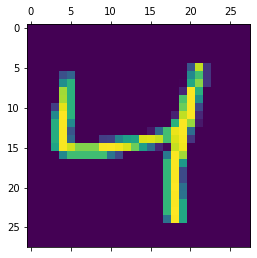

In [6]:
plt.matshow(x_train[2])
print(y_train[2])

In [7]:
#first five elements in the train dataset
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

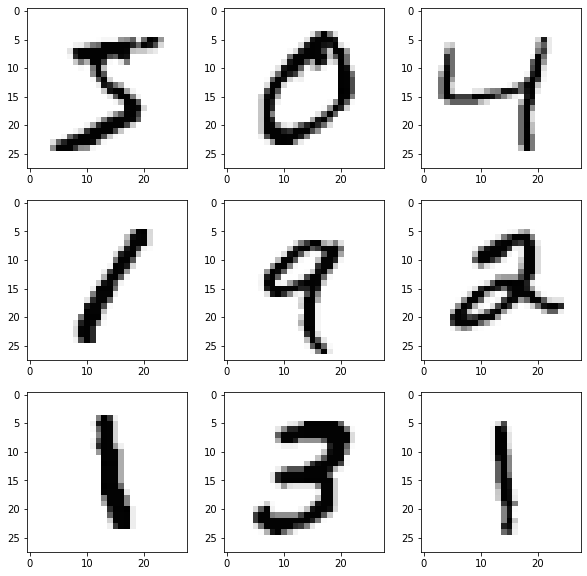

In [8]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv.threshold(x_train[i], 30, 200, cv.THRESH_BINARY)
    axes[i].imshow(np.reshape(x_train[i], (28,28)), cmap="Greys")
plt.show()

In [9]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [10]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4746 - accuracy: 0.8675
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1155 - accuracy: 0.9637
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9772


In [12]:
loss,accuracy = model.evaluate(x_test, y_test)
print("loss:",loss)
print("accuracy:",accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9708
loss: 0.09470106661319733
accuracy: 0.97079998254776


In [13]:
y_predicted = model.predict(x_test)
y_predicted[0]

array([1.1781639e-09, 3.4347959e-08, 1.7579556e-05, 2.9683076e-06,
       9.6430397e-10, 1.2419498e-08, 4.1948614e-13, 9.9997938e-01,
       3.9830250e-09, 1.0632857e-07], dtype=float32)

Predicted value using model is: 7


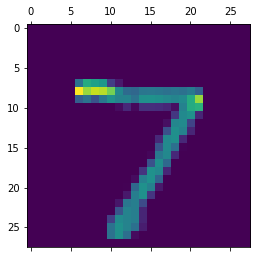

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(x_test[0])
print("Predicted value using model is:",np.argmax(y_predicted[0]))

In [15]:
#this is to be done because labels are whole numbers but 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    3,    1,    1,    0,    2,    1,    2,    3],
       [   0, 1123,    4,    0,    0,    0,    3,    0,    5,    0],
       [   2,    1, 1022,    1,    1,    0,    1,    3,    1,    0],
       [   0,    1,   13,  978,    0,    4,    0,    7,    5,    2],
       [   0,    1,   11,    0,  954,    0,    6,    0,    3,    7],
       [   3,    0,    0,   19,    0,  850,    8,    1,    8,    3],
       [   5,    2,    1,    1,    1,    3,  941,    0,    4,    0],
       [   3,    3,   22,    6,    0,    1,    0,  988,    3,    2],
       [   4,    2,   26,    7,    3,    3,    3,    3,  920,    3],
       [   3,    4,    1,    8,   16,    3,    0,    3,    6,  965]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

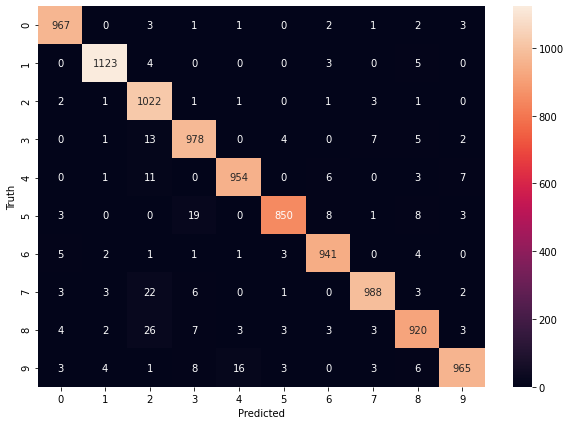

In [17]:
#visualizung confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

The Predicted result using model is  7


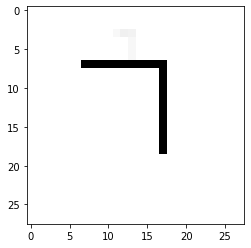

In [20]:
img=cv.imread(r"/content/sample_data/num7.png")[:,:,0]
img=np.invert(np.array([img]))
prediction=model.predict(img)
print("The Predicted result using model is ",np.argmax(prediction))
plt.imshow(img[0],cmap=plt.cm.binary)
plt.show()